# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import os
from os import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
!which python3

/home/slava/Рабочий стол/made_ml/.venv/bin/python3


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import scikitplot
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]


print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
def update_data():
    global X_train, X_test, y_train, y_test, dataset, target
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,656,84,42,76,156,64,7,151,44,19,143,179,339,157,75,0,20,187,193
1,68,86,44,78,164,68,9,142,46,18,147,168,305,171,70,1,11,190,201
2,171,106,54,103,161,47,4,247,27,27,166,266,892,242,85,4,11,181,183
3,374,87,36,53,117,58,4,118,57,17,125,138,205,138,85,9,15,180,183
4,820,87,38,71,123,53,8,137,49,18,127,158,277,145,75,0,9,181,186
5,803,93,47,84,205,71,7,176,36,21,152,190,476,201,70,7,19,198,201
6,808,83,46,68,139,59,6,150,44,19,146,172,336,183,74,5,3,185,191
7,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
8,460,90,41,62,147,60,6,128,52,18,141,149,246,157,61,13,4,201,208
9,629,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.085610,93.408015,44.959927,81.741348,168.746812,61.927140,8.699454,168.196721,41.038251,20.535519,148.269581,188.156648,436.10929,175.010929,72.642987,6.362477,12.154827,188.841530,195.577413
std,243.516764,8.214351,6.129252,15.663621,34.550128,8.760925,5.191481,32.676828,7.690191,2.558996,14.591025,30.956425,173.25067,31.626064,7.854984,5.011095,8.701229,6.197364,7.303629
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.00000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,211.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,319.00000,152.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,417.000000,92.000000,44.000000,78.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,177.000000,362.00000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,631.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.00000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.00000,268.000000,135.000000,22.000000,38.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Strong correlated features will have a bad effect on logistic regression. That's why I delete some some strong correlated (>0.95) features.

In [7]:
update_data()

In [8]:
THRESHOLD = 0.955  # гиперпараметр решения

strong_corr = []
for name, row in X_train_pd.corr().iterrows():
    for i, j in enumerate(row):
        if abs(j) > THRESHOLD and X_train_pd.columns[i] != name\
                and (X_train_pd.columns[i], name, j) not in strong_corr:
            strong_corr.append((name, X_train_pd.columns[i], j))
for i in strong_corr:
    print(i)


(2, 10, 0.9650502540096497)
(7, 8, -0.9733901727693587)
(7, 9, 0.992088533038415)
(7, 12, 0.9966011476930219)
(8, 12, -0.957939637764087)
(9, 12, 0.992279447487879)


In [9]:
bad_features = set()
for i, j, k in strong_corr:
    bad_features.add(j)
print(bad_features)
X_train = np.delete(X_train, list(bad_features),axis = 1)
X_test = np.delete(X_test, list(bad_features),axis = 1)

{8, 9, 10, 12}


Features values must be in same scale. To make decision on the type of normalization I look plots

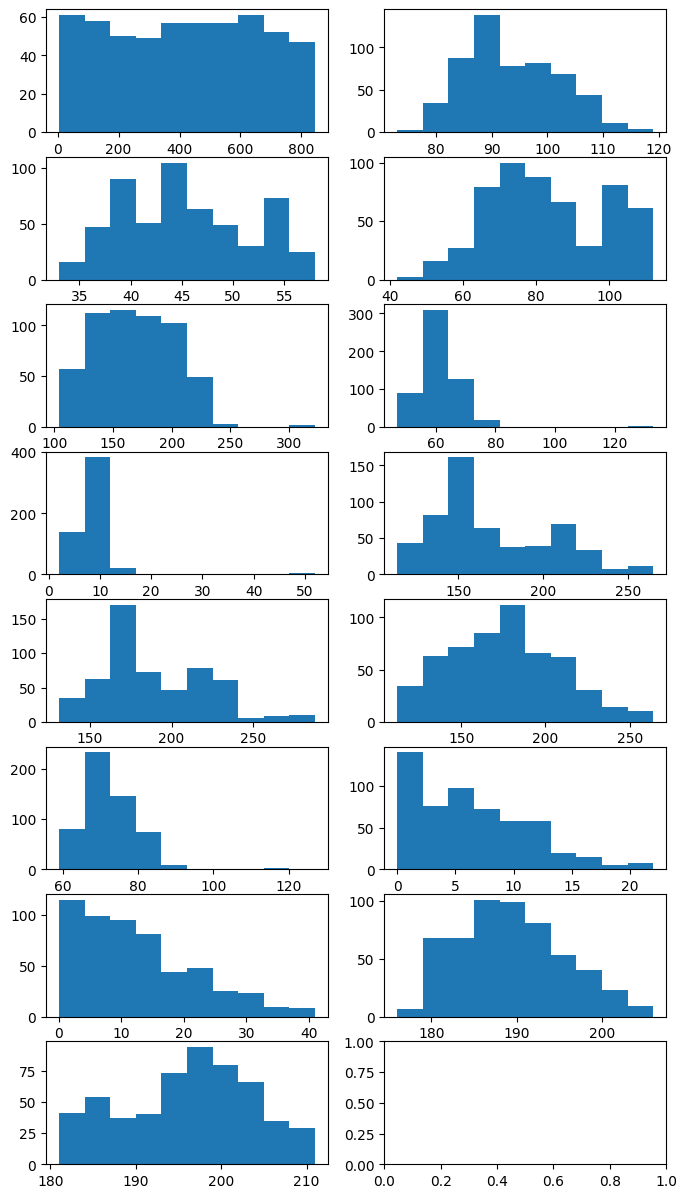

In [11]:
fig, axes = plt.subplots((X_train.shape[1] + 1)//2, 2, figsize=(8, 15))

for i, axis in enumerate(axes.flat):
    if i == 15:
        break
    axis.hist(X_train[:, i])

Each graph has similarities with a normal distribution. Therefore I use StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
def prepare_data_for_linear():
  global X_train_pd, X_train, X_test
  THRESHOLD = 0.95
  strong_corr = []
  for name, row in X_train_pd.corr().iterrows():
    for i, j  in enumerate(row):
      if abs(j) > THRESHOLD and X_train_pd.columns[i] != name\
      and (X_train_pd.columns[i], name, j) not in strong_corr:
        strong_corr.append((name, X_train_pd.columns[i], j))
  bad_features = set()
  for i, j, k in strong_corr:
      bad_features.add(j)
  X_train = np.delete(X_train, list(bad_features),axis = 1)
  X_test = np.delete(X_test, list(bad_features),axis = 1)
  print(X_train.shape, X_test.shape)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [14]:
update_data()
prepare_data_for_linear()

(549, 15) (297, 15)


In [15]:
clf = LogisticRegression(random_state=0,multi_class='multinomial',solver='saga', tol=1e-3, max_iter=500)

parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'C':[0.5, 1, 3, 5, 10]}

model = GridSearchCV(clf, parameters)
model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          random_state=0, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.5, 1, 3, 5, 10],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none')})

In [16]:
model.best_params_

{'C': 0.5, 'penalty': 'none'}

In [17]:
def show_metrics(y_true, X, model):
    y_pred = model.predict(X)
    print("f1 score Test =", f1_score(y_test, y_pred, average = 'macro'))
    print("accuracy score Test =", balanced_accuracy_score(y_test, y_pred))
    scikitplot.metrics.plot_roc(y_test, model.predict_proba(X_test))

f1 score Test = 0.7893082936248405
accuracy score Test = 0.7897524567311581


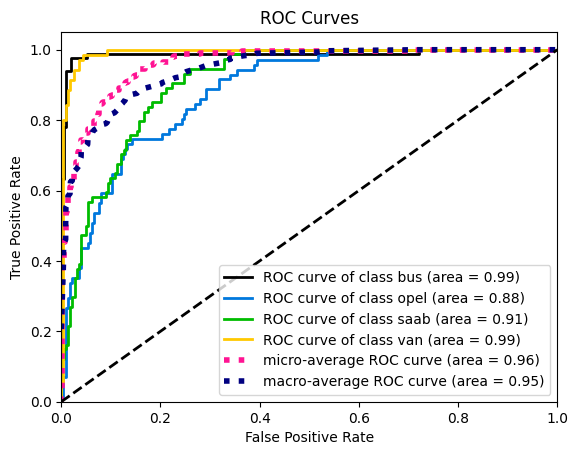

In [18]:
show_metrics(y_test, X_test, model)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [63]:
update_data()

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
pca = PCA()
pca.fit(X_train)

PCA()

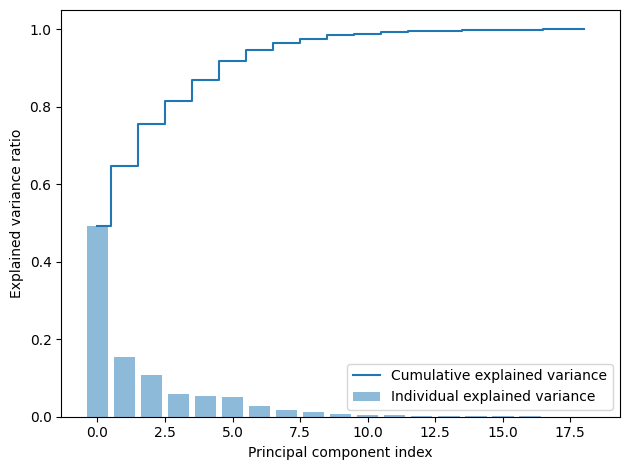

In [65]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

I am chosen 12 comp. because I don't lose alot of data. Yes, in PCA yous should normalize your data because of connections with covariance matrix.

In [66]:
X_test = scaler.transform(X_test)
pca = PCA(n_components = 12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [67]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((297, 12), (297,), (549, 12), (549,))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [68]:
clf = LogisticRegression(random_state=0,multi_class='multinomial',solver='saga', tol=1e-3)

parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 'C':[0.5, 1, 3, 5, 10]}

model = GridSearchCV(clf, parameters)
model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial',
                                          random_state=0, solver='saga',
                                          tol=0.001),
             param_grid={'C': [0.5, 1, 3, 5, 10],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none')})

f1 score Test = 0.7415164780177308
accuracy score Test = 0.7462732588665425


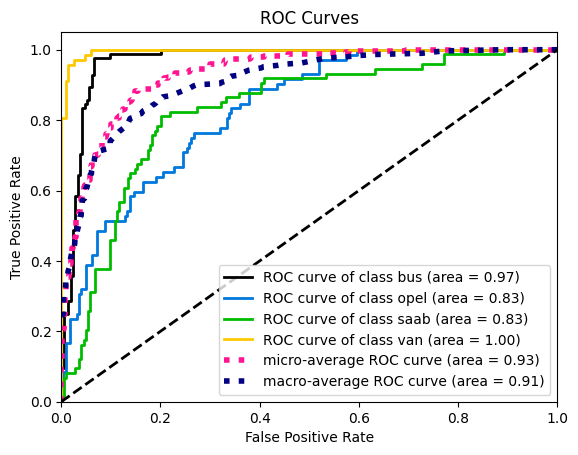

In [69]:
show_metrics(y_test, X_test, model)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [70]:
clf = DecisionTreeClassifier()

parameters = {'max_depth' : range(30, 100)}

model = GridSearchCV(clf, parameters)
model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(30, 100)})

In [71]:
model.best_params_

{'max_depth': 62}

f1 score Test = 0.6295309187058794
accuracy score Test = 0.633080175057787


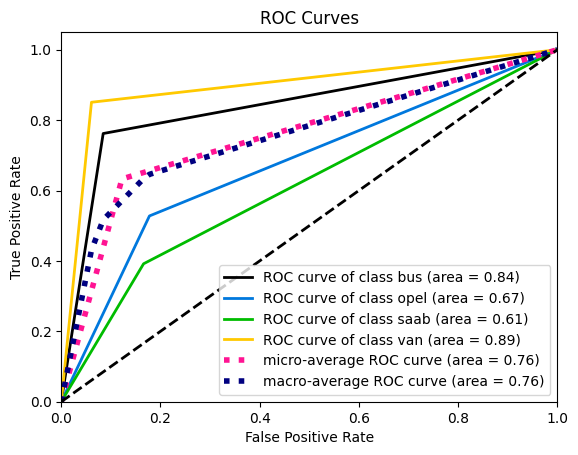

In [72]:
show_metrics(y_test, X_test, model)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [30]:
update_data()
prepare_data_for_linear()

(549, 15) (297, 15)


In [31]:
def Bagging(model, X_train, y_train, X_test):
    res_list = []
    for i in range(100):
        print("Iteration =", i + 1)
        rand_idx = np.random.randint(0, X_train.shape[0], size=X_train.shape[0])
        X_train_r, y_train_r = X_train[rand_idx, : ], y_train[rand_idx]
        model.fit(X_train_r, y_train_r)
        res_list.append(model.predict_proba(X_test))
    res_save = []
    for i in range(2, 100, 5):
        res = np.zeros((X_test.shape[0], 4))
        for j in range(i):
            res = res + res_list[j]
        res = np.argmax(res, axis = 1)
        res_save.append((i, np.array([model.classes_[res[i]] for i in range(res.shape[0])])))
    return res_save

In [32]:
import matplotlib.pyplot as plt
def print_plots(res, y_test):
    res_f1, res_ac, sz = [], [], []
    
    for i, j in res:
        res_f1.append(f1_score(y_test, j, average = 'macro'))
        res_ac.append(balanced_accuracy_score(y_test, j))
        sz.append(i)
    plt.xlabel("Size")
    plt.ylabel("Res")
    plt.xticks(sz)
    plt.plot(sz, res_f1, label = "f1")
    plt.plot(sz, res_ac, label = "accuracy")
    plt.legend()

In [33]:

clf = LogisticRegression(random_state=0,multi_class='multinomial',solver='saga', tol=1e-3)

parameters = {'C':[0.5, 1, 3]}

model = GridSearchCV(clf, parameters, verbose=0)
res = Bagging(model, X_train, y_train, X_test)


Iteration = 1
Iteration = 2
Iteration = 3
Iteration = 4
Iteration = 5
Iteration = 6
Iteration = 7
Iteration = 8
Iteration = 9
Iteration = 10
Iteration = 11
Iteration = 12
Iteration = 13
Iteration = 14
Iteration = 15
Iteration = 16
Iteration = 17
Iteration = 18
Iteration = 19
Iteration = 20
Iteration = 21
Iteration = 22
Iteration = 23
Iteration = 24
Iteration = 25
Iteration = 26
Iteration = 27
Iteration = 28
Iteration = 29
Iteration = 30
Iteration = 31
Iteration = 32
Iteration = 33
Iteration = 34
Iteration = 35
Iteration = 36
Iteration = 37
Iteration = 38
Iteration = 39
Iteration = 40
Iteration = 41
Iteration = 42
Iteration = 43
Iteration = 44
Iteration = 45
Iteration = 46
Iteration = 47
Iteration = 48
Iteration = 49
Iteration = 50
Iteration = 51
Iteration = 52
Iteration = 53
Iteration = 54
Iteration = 55
Iteration = 56
Iteration = 57
Iteration = 58
Iteration = 59
Iteration = 60
Iteration = 61
Iteration = 62
Iteration = 63
Iteration = 64
Iteration = 65
Iteration = 66
Iteration = 67
Iter

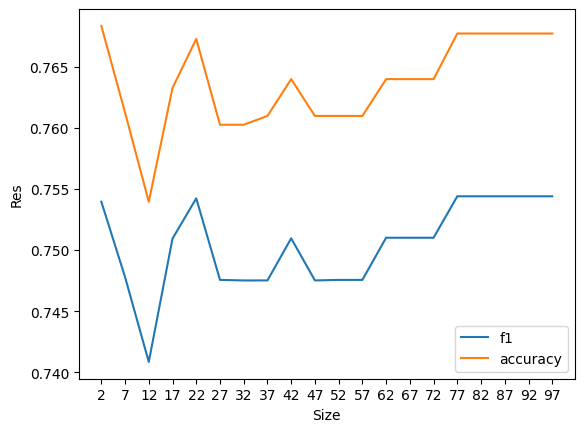

In [34]:
print_plots(res,y_test)

In [36]:
update_data()

In [37]:
clf = DecisionTreeClassifier()

parameters = {'max_depth' : range(30, 100)}

model = GridSearchCV(clf, parameters)
res = Bagging(model, X_train, y_train, X_test)

Iteration = 1
Iteration = 2
Iteration = 3
Iteration = 4
Iteration = 5
Iteration = 6
Iteration = 7
Iteration = 8
Iteration = 9
Iteration = 10
Iteration = 11
Iteration = 12
Iteration = 13
Iteration = 14
Iteration = 15
Iteration = 16
Iteration = 17
Iteration = 18
Iteration = 19
Iteration = 20
Iteration = 21
Iteration = 22
Iteration = 23
Iteration = 24
Iteration = 25
Iteration = 26
Iteration = 27
Iteration = 28
Iteration = 29
Iteration = 30
Iteration = 31
Iteration = 32
Iteration = 33
Iteration = 34
Iteration = 35
Iteration = 36
Iteration = 37
Iteration = 38
Iteration = 39
Iteration = 40
Iteration = 41
Iteration = 42
Iteration = 43
Iteration = 44
Iteration = 45
Iteration = 46
Iteration = 47
Iteration = 48
Iteration = 49
Iteration = 50
Iteration = 51
Iteration = 52
Iteration = 53
Iteration = 54
Iteration = 55
Iteration = 56
Iteration = 57
Iteration = 58
Iteration = 59
Iteration = 60
Iteration = 61
Iteration = 62
Iteration = 63
Iteration = 64
Iteration = 65
Iteration = 66
Iteration = 67
Iter

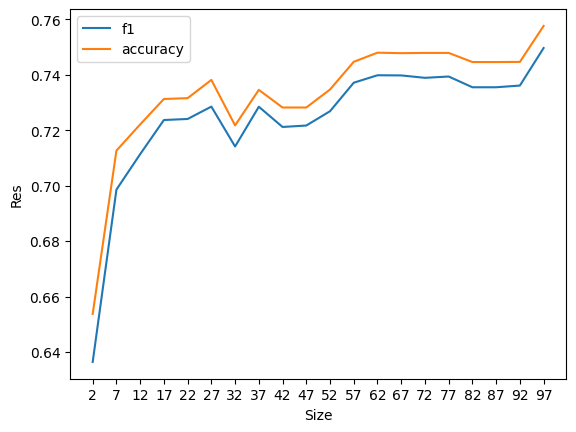

In [38]:
print_plots(res,y_test)

* For logistic regression the the optimal number of algorithms is 1-2. Bagging decreases variance, but in linear models its already low.
* For decision tree the optimal number of algorithms is maximum allowable. On plot we see that f1 and accurance grow with increasing models. Bagging decreases variance, which in decision trees big.
* I think the hyperparameters for decision trees found in 2.5 are not optimal. Since decision trees have a large variance, there will be completely different trees for different subsets of the data.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [39]:
update_data()

In [40]:
from sklearn.ensemble import RandomForestClassifier

res = []

for i in range(2, 100, 5):
    model = RandomForestClassifier(n_estimators = i)
    model.fit(X_train, y_train)
    res.append((i, model.predict(X_test)))

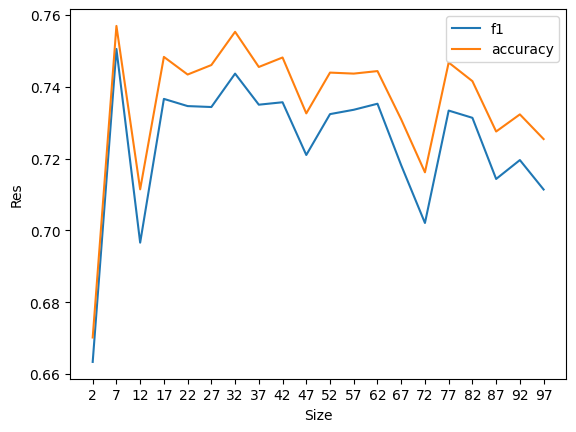

In [41]:
print_plots(res, y_test)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [42]:
update_data()
prepare_data_for_linear()

(549, 15) (297, 15)


In [43]:
def get_batches():
    X_bt, y_bt = [], []
    element_batch = (X_train.shape[0] + 9)//10
    for i in range(0,  element_batch* 10, element_batch):
        last = min(i + element_batch, X_train.shape[0])
        X_bt.append(X_train[0 : last])
        y_bt.append(y_train[0 : last])
    print(len(X_bt), len(y_bt))
    return X_bt, y_bt

In [44]:
def validate(model):
    global X_test, y_test
    X_bt, y_bt = get_batches()
    res_f1 = []
    res_ac = []
    for X, y in zip(X_bt, y_bt):
        model.fit(X, y)
        pred = model.predict(X_test)
        res_f1.append(f1_score(y_test, pred, average = 'macro'))
        res_ac.append(balanced_accuracy_score(y_test, pred))
    sz = list(range(1, 11))
    plt.xlabel("Size")
    plt.ylabel("Res")
    plt.xticks(sz)
    plt.plot(sz, res_f1, label = "f1")
    plt.plot(sz, res_ac, label = "accuracy")
    plt.legend()

10 10


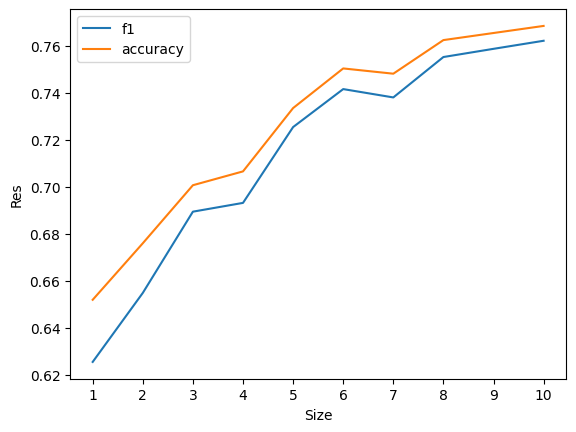

In [45]:
model = LogisticRegression(random_state=0,multi_class='multinomial',solver='saga', tol=1e-3, C= 0.5, penalty = 'none')
validate(model)

10 10


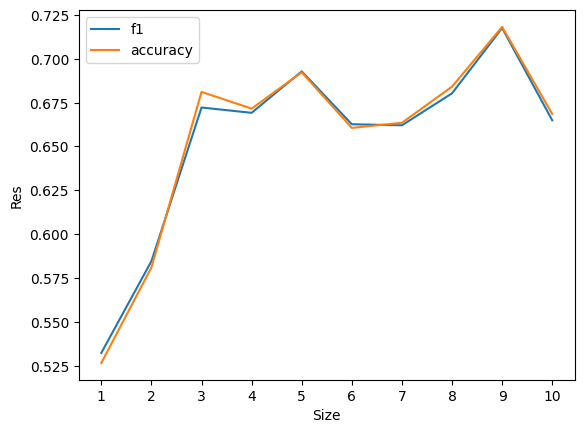

In [50]:
update_data()
model = DecisionTreeClassifier(max_depth=53)
validate(model)

For logistic regression the result increases with the with the growth of the dataset. This is because the logistic simple model, which manages to find better dependencies with an increase in the dataset. While the tree is overfitting with test data as the test set grows.